In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
%matplotlib inline

In [86]:
def analyse(df):
    text = ""
    for comment in df.Commentaire : 
        text += comment

    stop_words = set(stopwords.words('french'))
    stop_words.update(['a', 'si', 'aussi'])


    #Wordcloud
    wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50)

    plt.figure(figsize= (10,6)) # Initialisation d'une figure
    wc.generate(text)           # "Calcul" du wordcloud
    plt.imshow(wc) # Affichage
    plt.title(f'Wordcloud de {df.Jeu.iloc[0]}')
    plt.show()

    #Histogramme 
    # Tokenisation du texte
    words = word_tokenize(text, language='french')

    # Suppression des stopwords
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    nb_com = len(df['Commentaire'])

    dico = Counter(filtered_words)
    mots = [m[0] for m in dico.most_common(20)]
    freq = [m[1] for m in dico.most_common(20)]

    plt.figure(figsize= (10,6))
    sns.barplot(x=mots, y=freq)
    plt.xticks(rotation = 45)
    plt.title(f'20 mots les plus fréquemment employés par les internautes pour {nb_com} commentaires {df.Jeu.iloc[0]}')
    plt.show()

    #VADER Analyse :

    sia = SentimentIntensityAnalyzer()

    # Run the polarity score on the entire dataset
    res = {}
    for i, row in df.iterrows():
        text = row['Commentaire']
        myid = row.name
        res[myid] = sia.polarity_scores(text)


    vaders = pd.DataFrame(res).T
    vaders = vaders.reset_index().rename(columns={'index': 'Id'})
    vaders = vaders.merge(df, how='left')

    vaders = vaders.drop(['Date du commentaire','Critique lue'], axis = 1)
    vaders.Date_commentaire = pd.to_datetime(vaders.Date_commentaire)

    vaders['Avis'] = vaders.apply(lambda x : 'positif' if x['compound']>=0 else 'negatif', axis = 1)
    print(vaders['Avis'].value_counts())
    
    palette = {'positif': 'green', 'negatif': 'red'}

    ax = sns.countplot(x='Avis', data=vaders, palette=palette)
    ax.set_title(f'Nombre de commentaire en fonction du sentiment pour {df.Jeu.iloc[0]}')
    plt.show()

    return(vaders)

In [97]:
chemin_fichier = '/Users/chalmotdelamesliere/Desktop/Projet video_games/analyse commentaire/2 eme analyse avec date/Commentaires_GTA_2.0/'

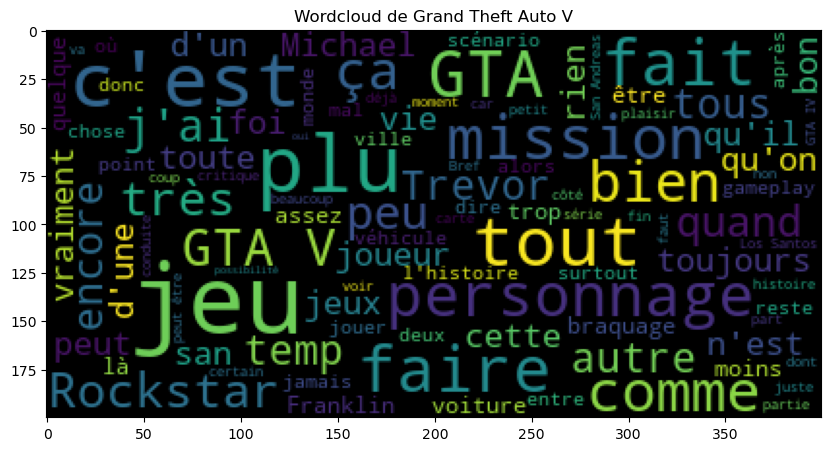

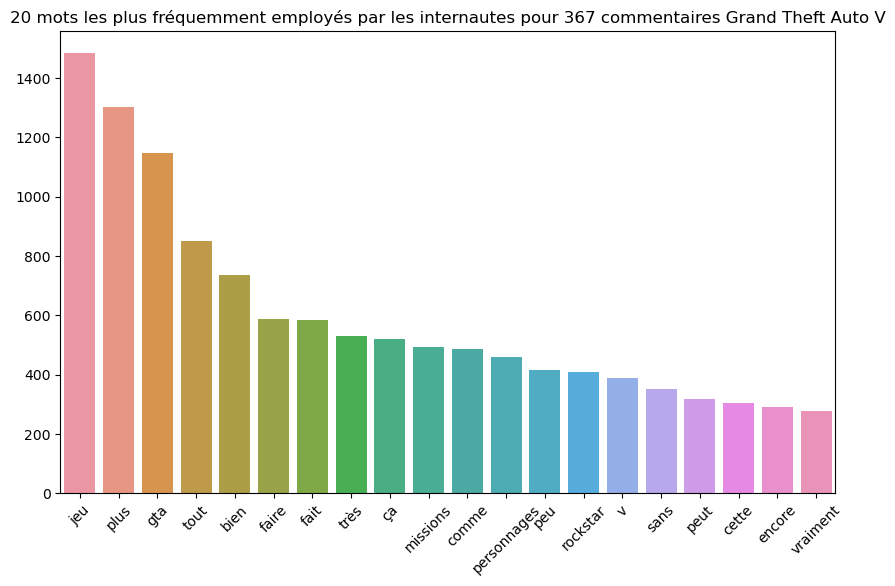

Avis
positif    226
negatif    141
Name: count, dtype: int64


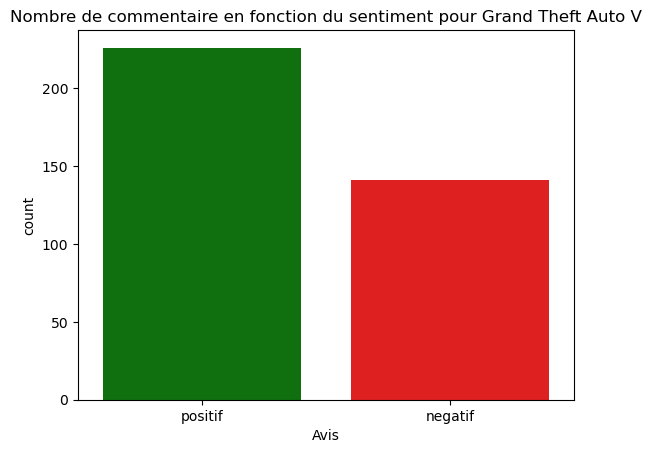

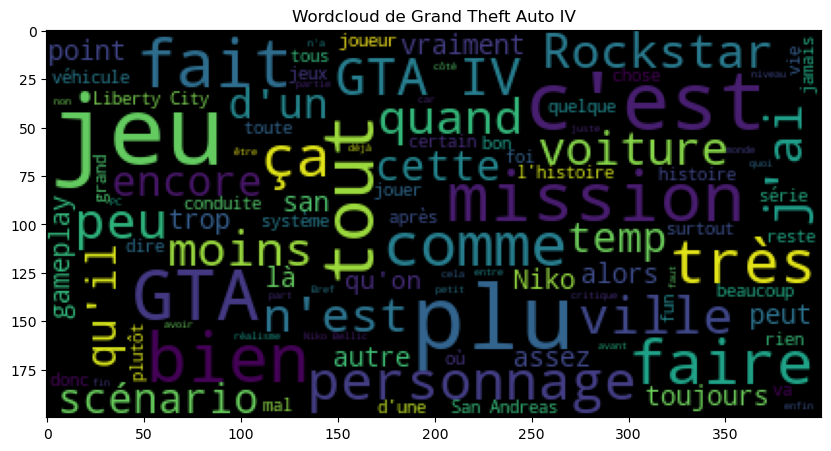

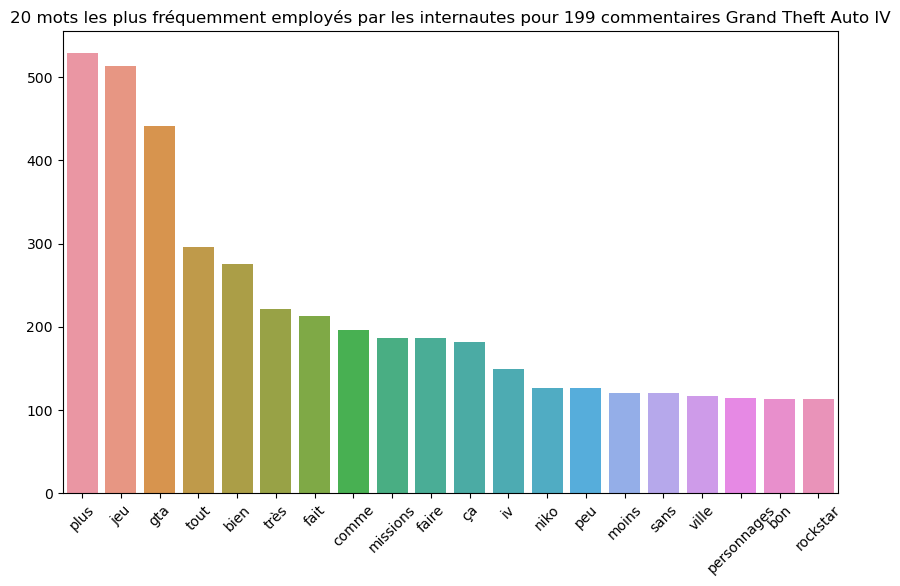

Avis
positif    141
negatif     58
Name: count, dtype: int64


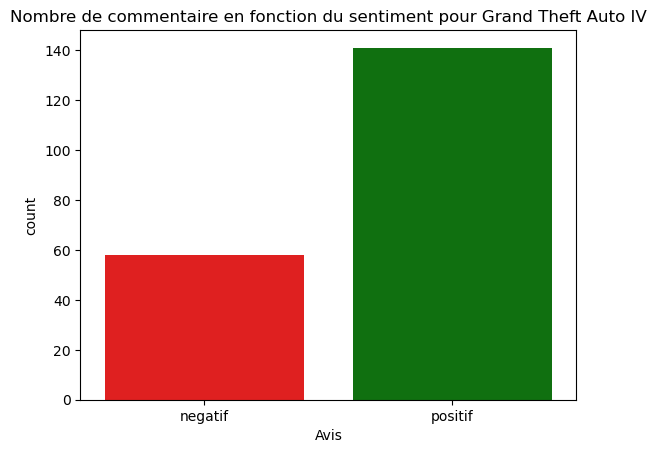

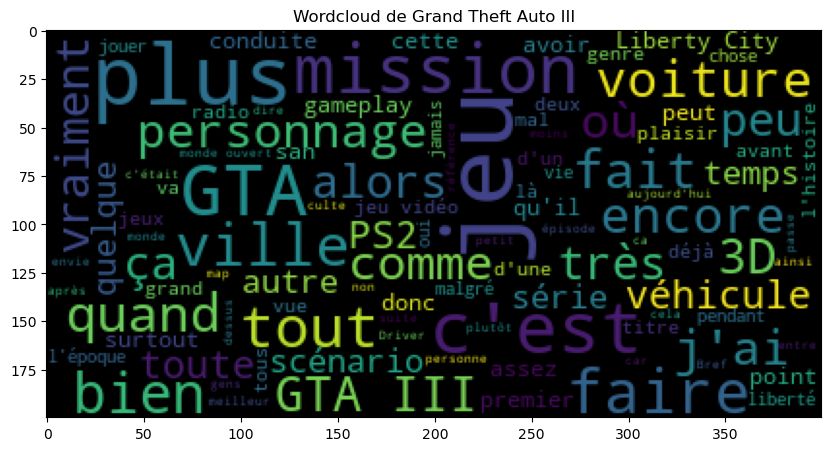

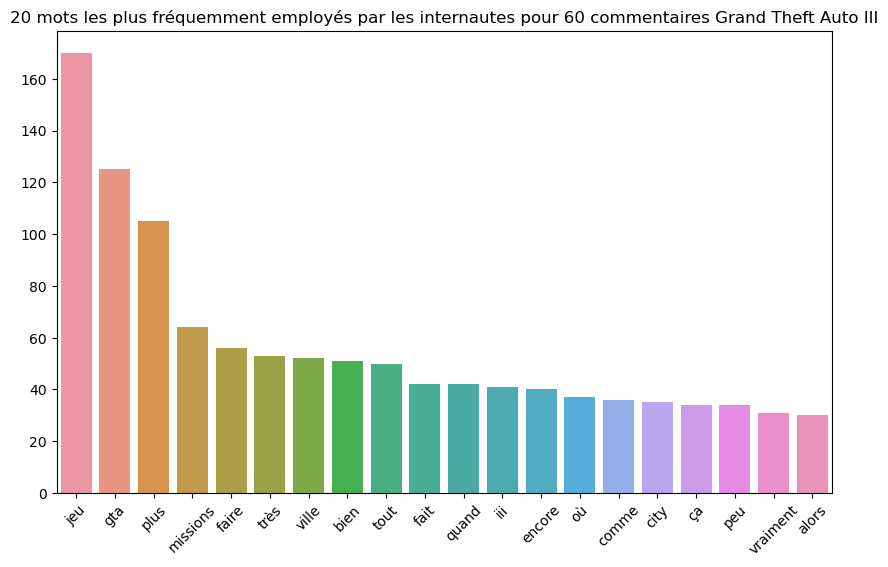

Avis
positif    43
negatif    17
Name: count, dtype: int64


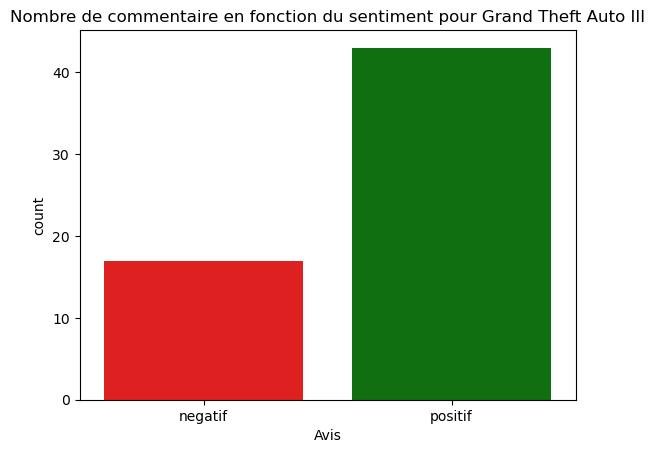

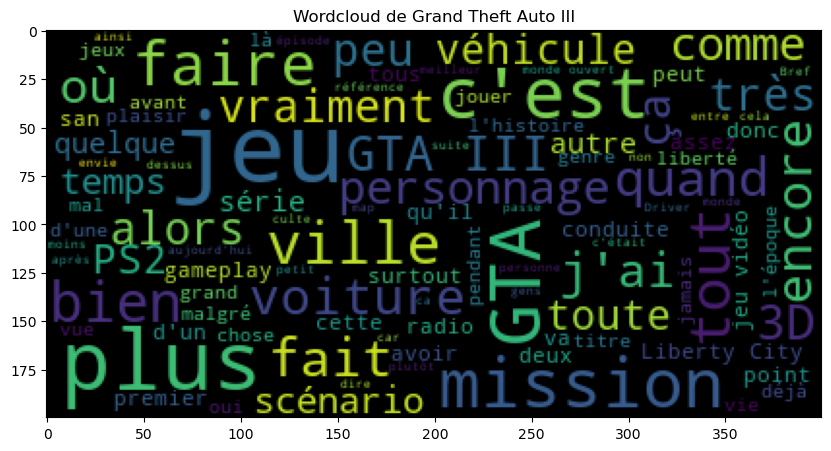

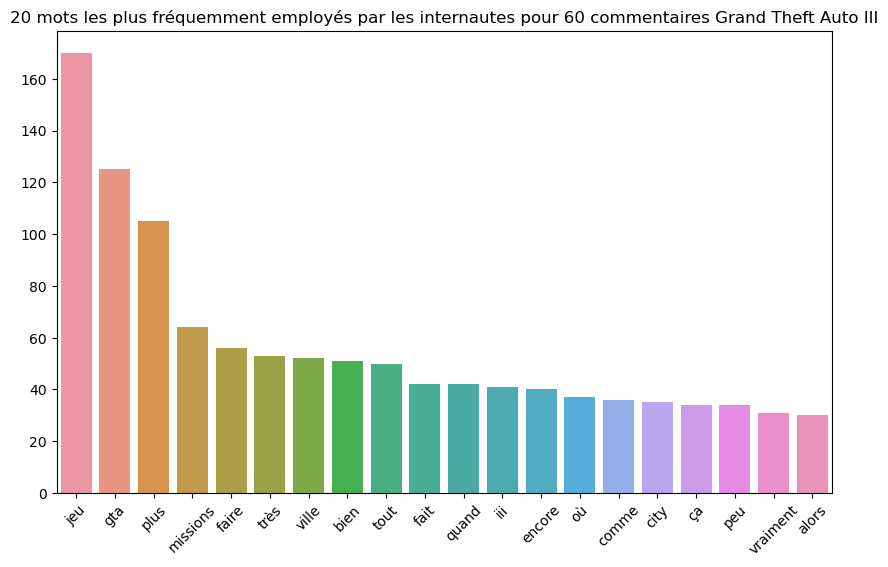

Avis
positif    43
negatif    17
Name: count, dtype: int64


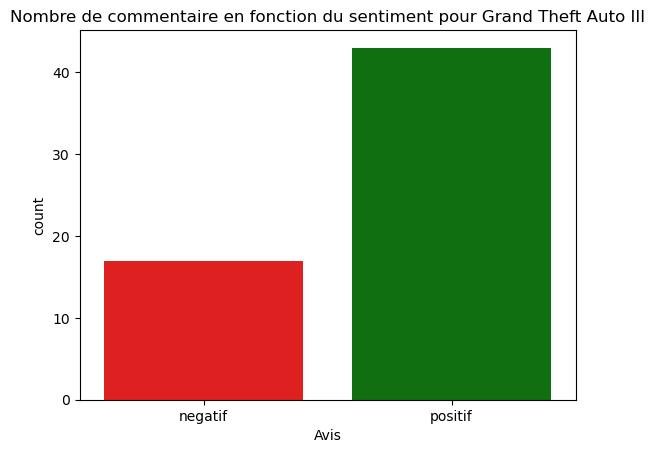

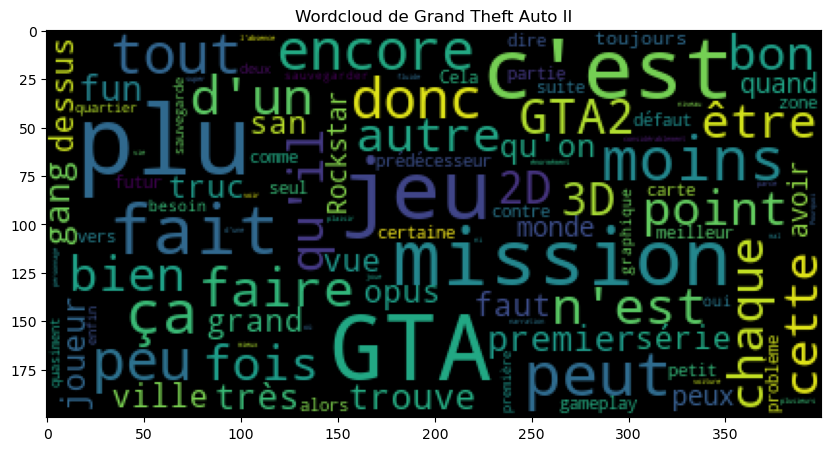

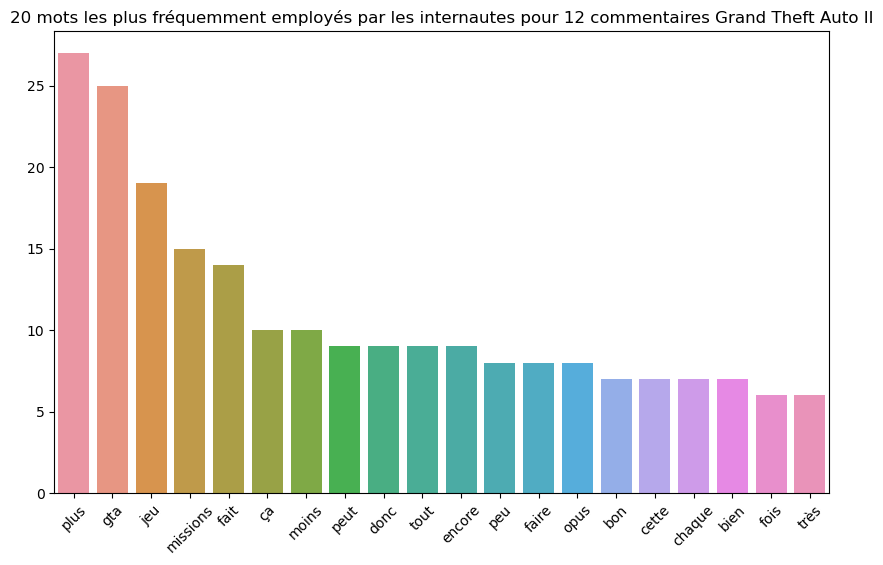

Avis
positif    10
negatif     2
Name: count, dtype: int64


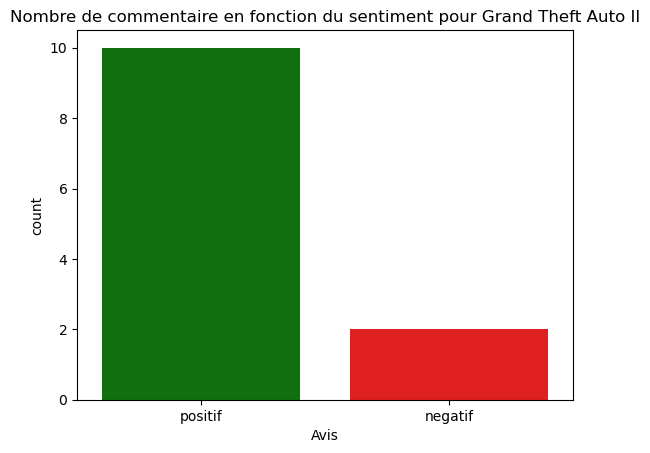

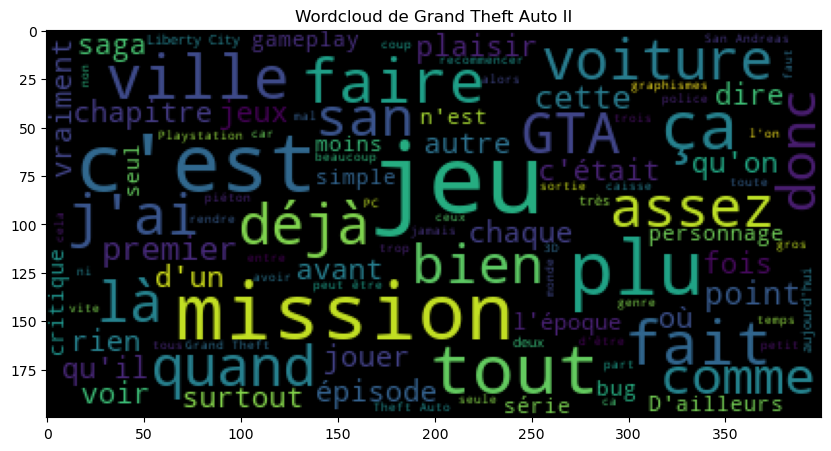

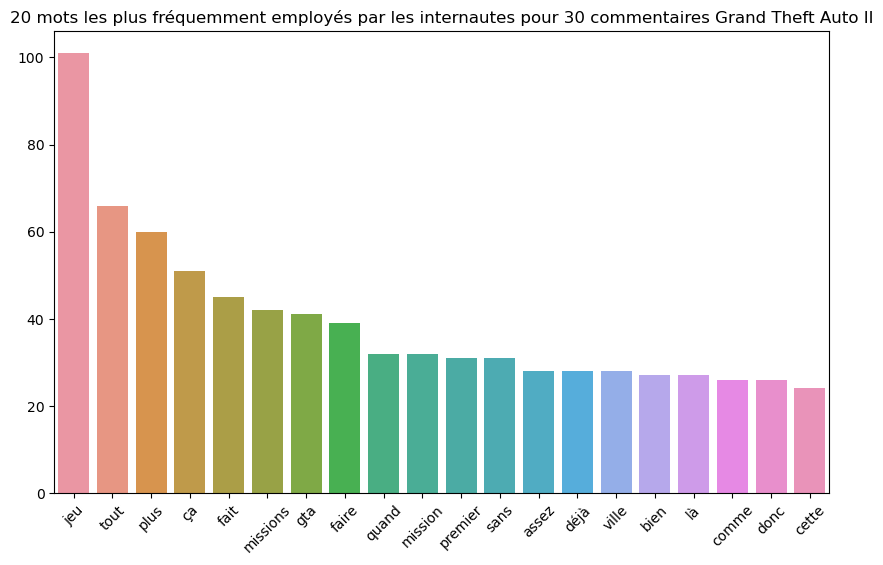

Avis
positif    17
negatif    13
Name: count, dtype: int64


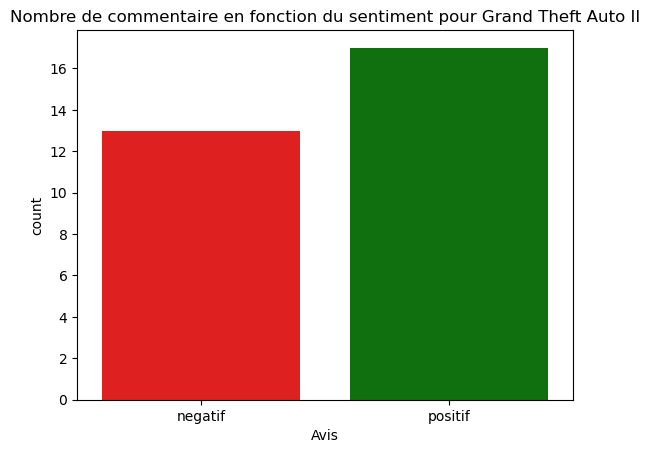

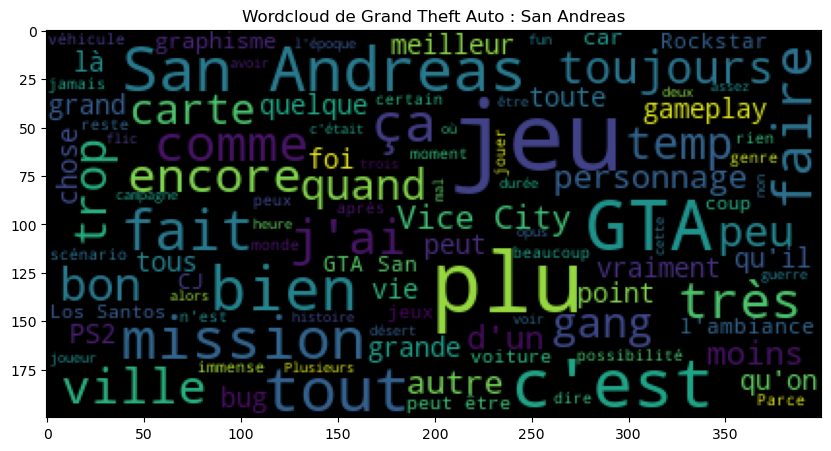

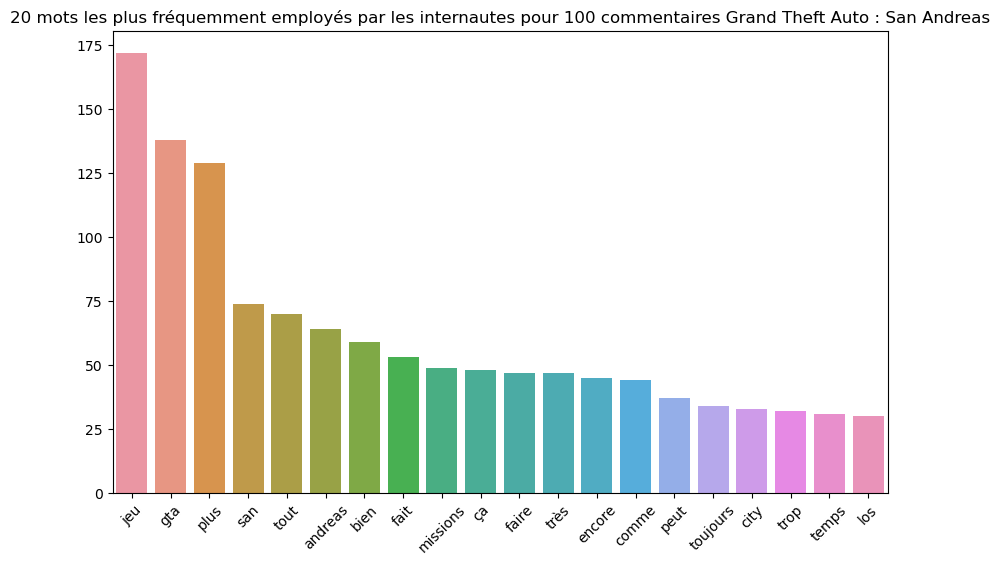

Avis
positif    81
negatif    19
Name: count, dtype: int64


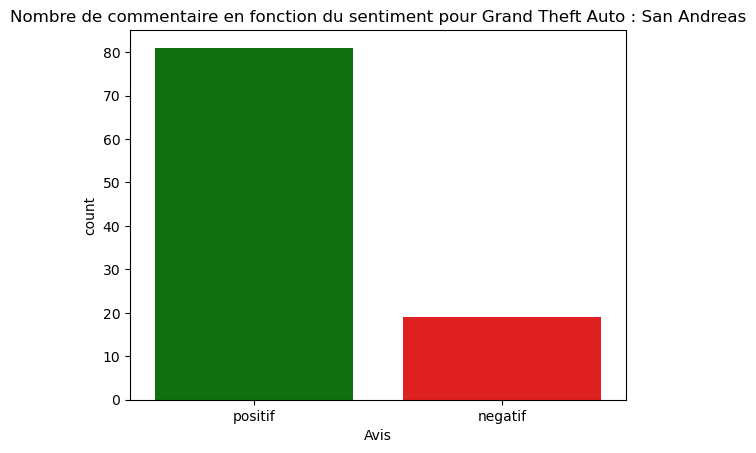

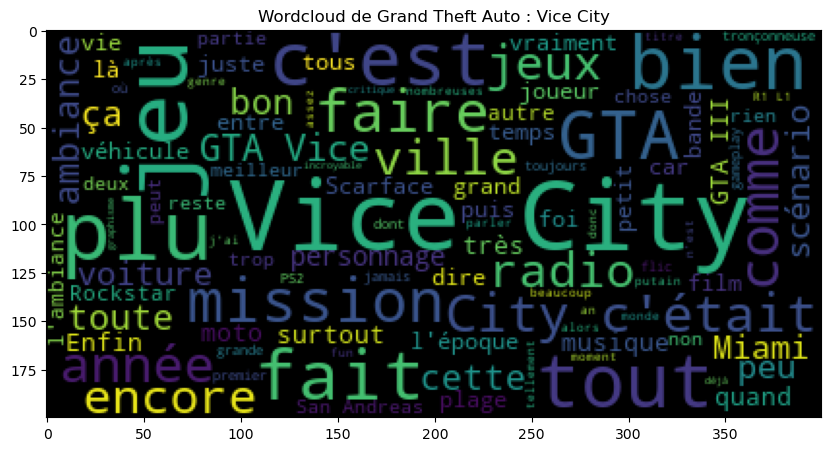

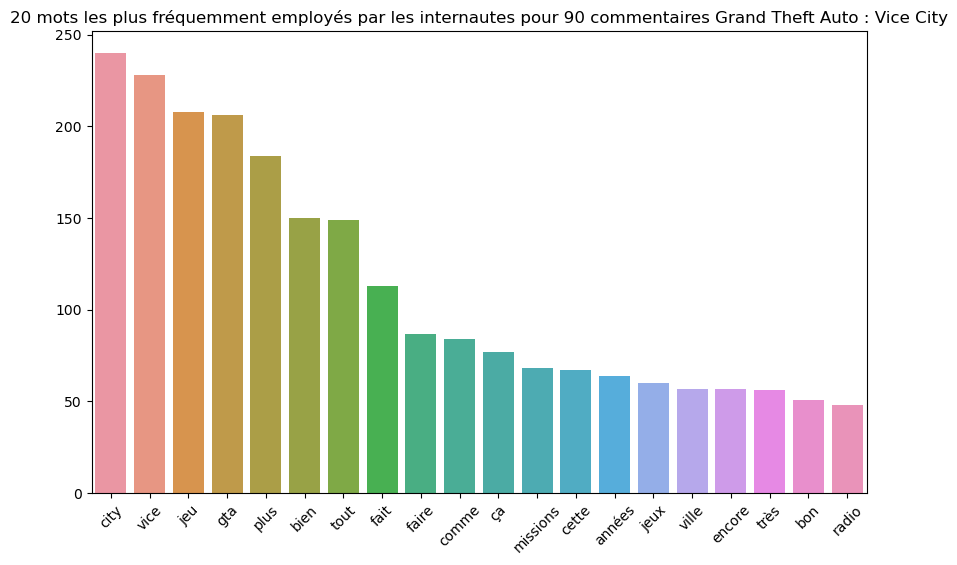

Avis
positif    64
negatif    26
Name: count, dtype: int64


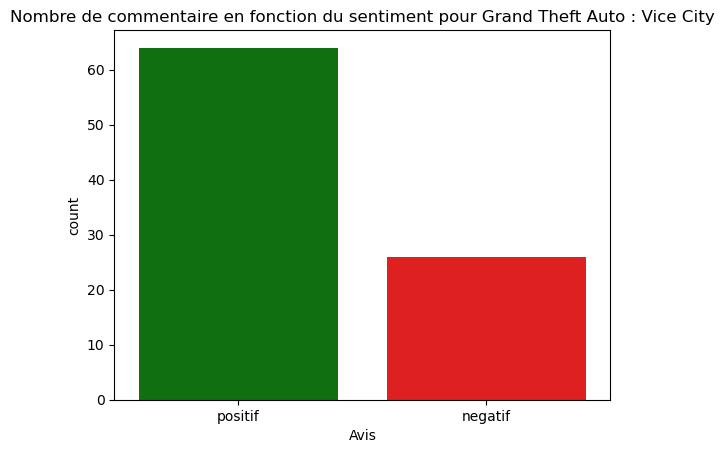

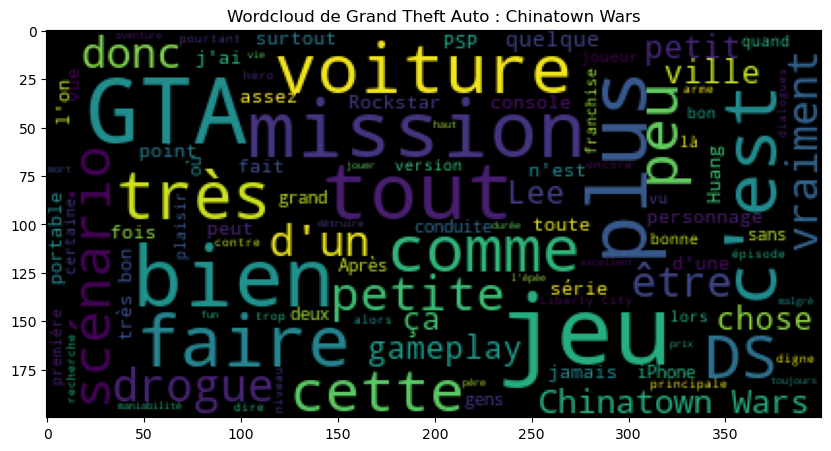

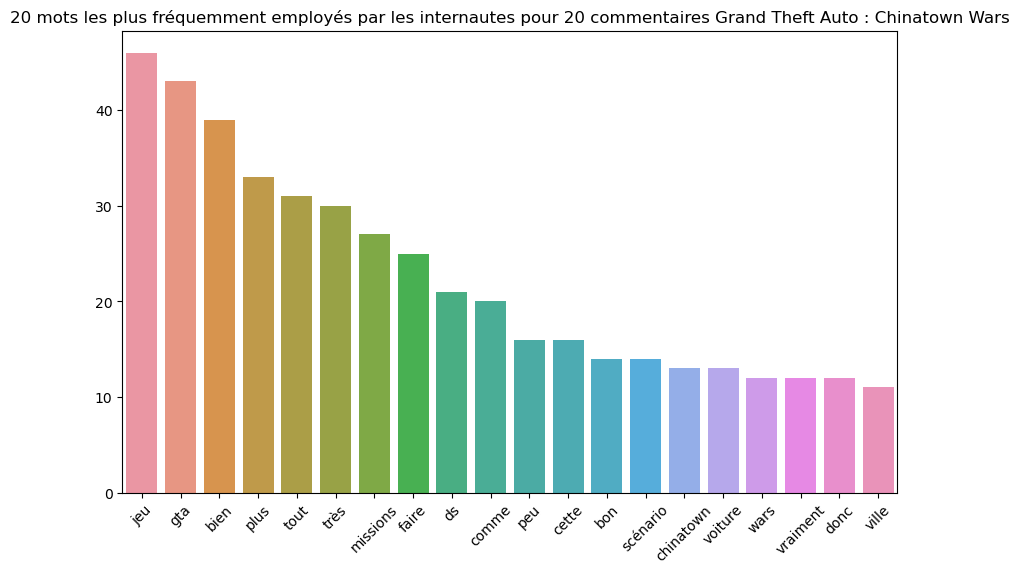

Avis
positif    14
negatif     6
Name: count, dtype: int64


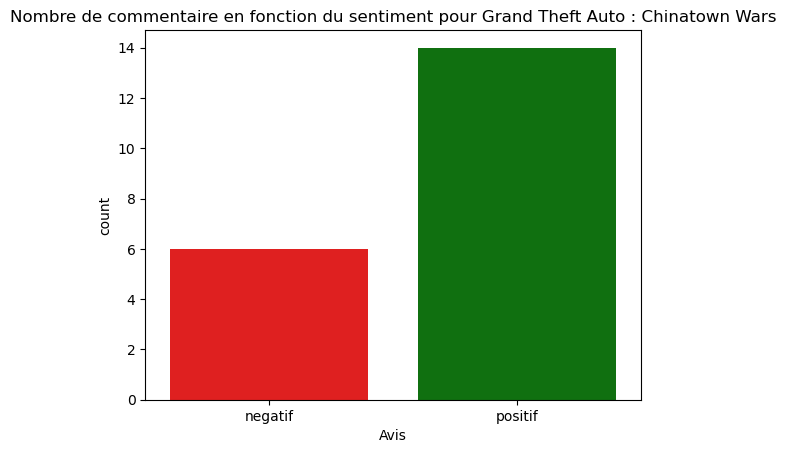

,Id,neg,neu,pos,compound,Jeu,Commentaire,Date_commentaire,Nombre_de_fois_critique_lue,Avis
0,0,0.081,0.910,0.009,-0.8858,Grand Theft Auto : Chinatown Wars,"""Ta coke coupée à la farine tu te la mets dans...",2010-05-12,625,negatif
1,1,0.000,0.962,0.038,0.5267,Grand Theft Auto : Chinatown Wars,Le pari était de faire rentrer dans une DS un ...,2011-09-11,756,positif
2,2,0.046,0.888,0.066,0.7003,Grand Theft Auto : Chinatown Wars,Toute l'essence d'un GTA dans une version port...,2010-10-04,437,positif
3,3,0.018,0.951,0.031,0.8816,Grand Theft Auto : Chinatown Wars,"Après le grand succès qu'à été GTA 4, la franc...",2022-03-19,27,positif
4,4,0.045,0.938,0.017,-0.1779,Grand Theft Auto : Chinatown Wars,"J'ai attendu ce jeu pendant longtemps, à l'épo...",2012-09-19,369,negatif
5,5,0.042,0.928,0.030,-0.2023,Grand Theft Auto : Chinatown Wars,"Le jeu est sorti sur DS, PSP et iPhone, c'est ...",2010-11-09,344,negatif
6,6,0.000,0.882,0.118,0.4939,Grand Theft Auto : Chinatown Wars,Une sacrée réussite pour la protégée de Ninten...,2010-09-22,329,positif
7,7,0.008,0.972,0.020,0.5399,Grand Theft Auto : Chinatown Wars,Assez ambitieux de porter un GTA sur la DS. Po...,2019-03-01,367,positif
8,8,0.139,0.805,0.056,-0.5267,Grand Theft Auto : Chinatown Wars,"ma quante ore ho passato su questo gioco, alme...",2019-02-11,128,negatif
9,9,0.000,1.000,0.000,0.0000,Grand Theft Auto : Chinatown Wars,Très bon jeu pour un premier GTA sur DS. Domma...,2016-07-19,345,positif


In [98]:
liste = ['GTA_V_comments.csv','GTA_IV_comments.csv', 'GTA_III_comments.csv', 'GTA_III_comments.csv', 
         'GTA_II_comments.csv', 'GTA_comments.csv','GTA_San_Andreas_comments.csv', 'GTA_Vice_City_comments.csv','GTA_Chinatown_Wars_comments.csv']

for i in liste :
    df = pd.read_csv(chemin_fichier+i, index_col = 0)
    df = df.reset_index().rename(columns={'index': 'Id'})

    vaders = analyse(df)
    vaders.to_csv(f'{i[:-4]}_vaders.csv')


vaders

In [80]:
vaders['Month'] = vaders.Date_commentaire.dt.month
vaders['Year'] = vaders.Date_commentaire.dt.year

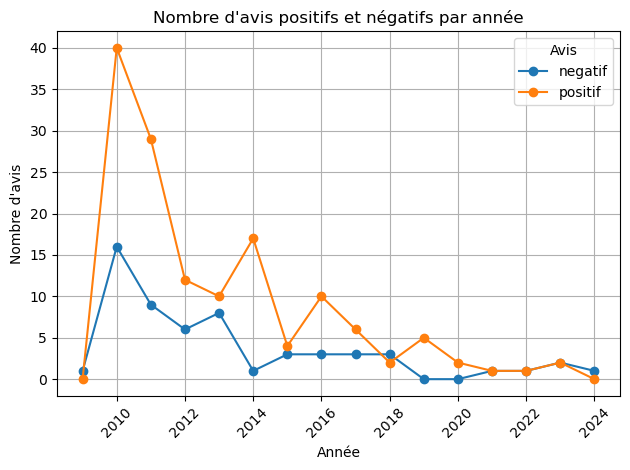

In [81]:

counts = vaders.groupby(['Year', 'Avis']).size().unstack(fill_value=0)

# Créer un line plot avec deux courbes
counts.plot(kind='line', marker='o')

# Ajouter des étiquettes et des titres
plt.title('Nombre d\'avis positifs et négatifs par année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'avis')
plt.xticks(rotation=45)
plt.legend(title='Avis')

# Afficher le graphique
plt.grid(True)  # Ajout de la grille pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique du tracé pour une meilleure présentation
plt.show()

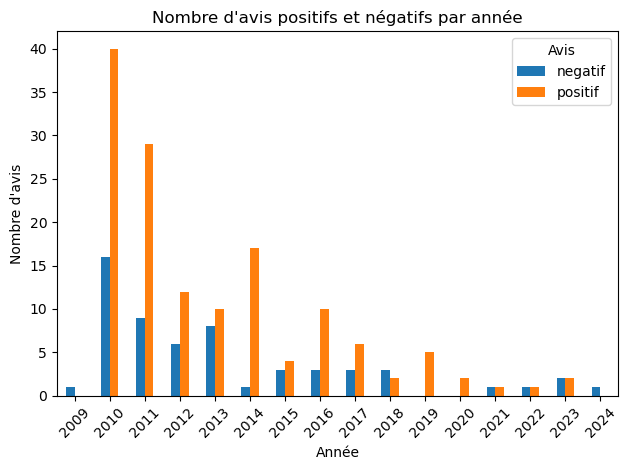

In [82]:
counts = vaders.groupby(['Year','Avis']).size().unstack(fill_value=0)


# Créer un graphique à barres
counts.plot(kind='bar', stacked=False)

# Ajouter des étiquettes et des titres

plt.title('Nombre d\'avis positifs et négatifs par année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'avis')
plt.xticks(rotation=45)
plt.legend(title='Avis')
plt.tight_layout()
# Afficher le graphique
plt.show()

In [83]:
df

,Id,Jeu,Commentaire,Date du commentaire,Critique lue,Date_commentaire,Nombre_de_fois_critique_lue
0,0,Grand Theft Auto IV,Bon plutôt que d'écrire un pavé sur tout ce qu...,Le 13 mai 2010,Critique lue 1.8K fois,2010-05-13,1800
1,1,Grand Theft Auto IV,"Merci la technique, car pour le reste, GTA IV ...",Le 3 octobre 2009,Critique lue 1K fois,2009-10-03,1000
2,2,Grand Theft Auto IV,"- Putain, c'est trop cool. GTA 4 à 5 euros sur...",Le 9 novembre 2011,Critique lue 1.4K fois,2011-11-09,1400
3,3,Grand Theft Auto IV,J'ai jamais pu terminer un GTA avant celui-ci ...,Le 6 janvier 2011,Critique lue 2.1K fois,2011-01-06,2100
4,4,Grand Theft Auto IV,J'avais beaucoup joué à GTA 1 étant jeune. Je ...,Le 19 février 2011,Critique lue 1.4K fois,2011-02-19,1400
...,...,...,...,...,...,...,...
194,194,Grand Theft Auto IV,Vraiment beau mais qu'est-ce qu'il est chiant....,Le 21 mai 2013,Critique lue 84 fois,2013-05-21,84
195,195,Grand Theft Auto IV,Que retenir de ce soft tant attendu? Graphique...,Le 28 juillet 2010,Critique lue 275 fois,2010-07-28,275
196,196,Grand Theft Auto IV,"GTA 4 est un excellent jeu, même si, après avo...",Le 27 juin 2010,Critique lue 277 fois,2010-06-27,277
197,197,Grand Theft Auto IV,La référence du genre bac à sable! Longtemps a...,Le 4 mai 2010,Critique lue 277 fois,2010-05-04,277
